In [1]:
# Import Needed Libraries
import numpy as np
import pandas as pd

# Turning off the warnings of ML
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read CSV Dataset
Insurance_df = pd.read_csv('insurance.csv')

In [3]:
# Shape of the Data
print('Number of rows: ',Insurance_df.shape[0])
print('Number of columns: ',Insurance_df.shape[1])

Number of rows:  348
Number of columns:  7


In [4]:
# Viewing the whole dataset
Insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
343,63,1,36.765,0,0,0,13981.85035
344,49,0,41.470,4,0,2,10977.20630
345,34,0,29.260,3,0,2,6184.29940
346,33,1,35.750,2,0,2,4889.99950


In [5]:
# Info of the data
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [6]:
# Describe 
Insurance_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [7]:
# Checking of missing columns
Insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Checking of missing values
Insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Checking the columns
Insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Exploratory Data Analysis

In [10]:
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')

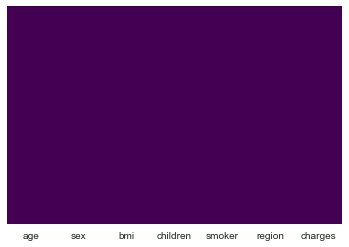

In [11]:
# Visualizing for the missing values
sns.heatmap(Insurance_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

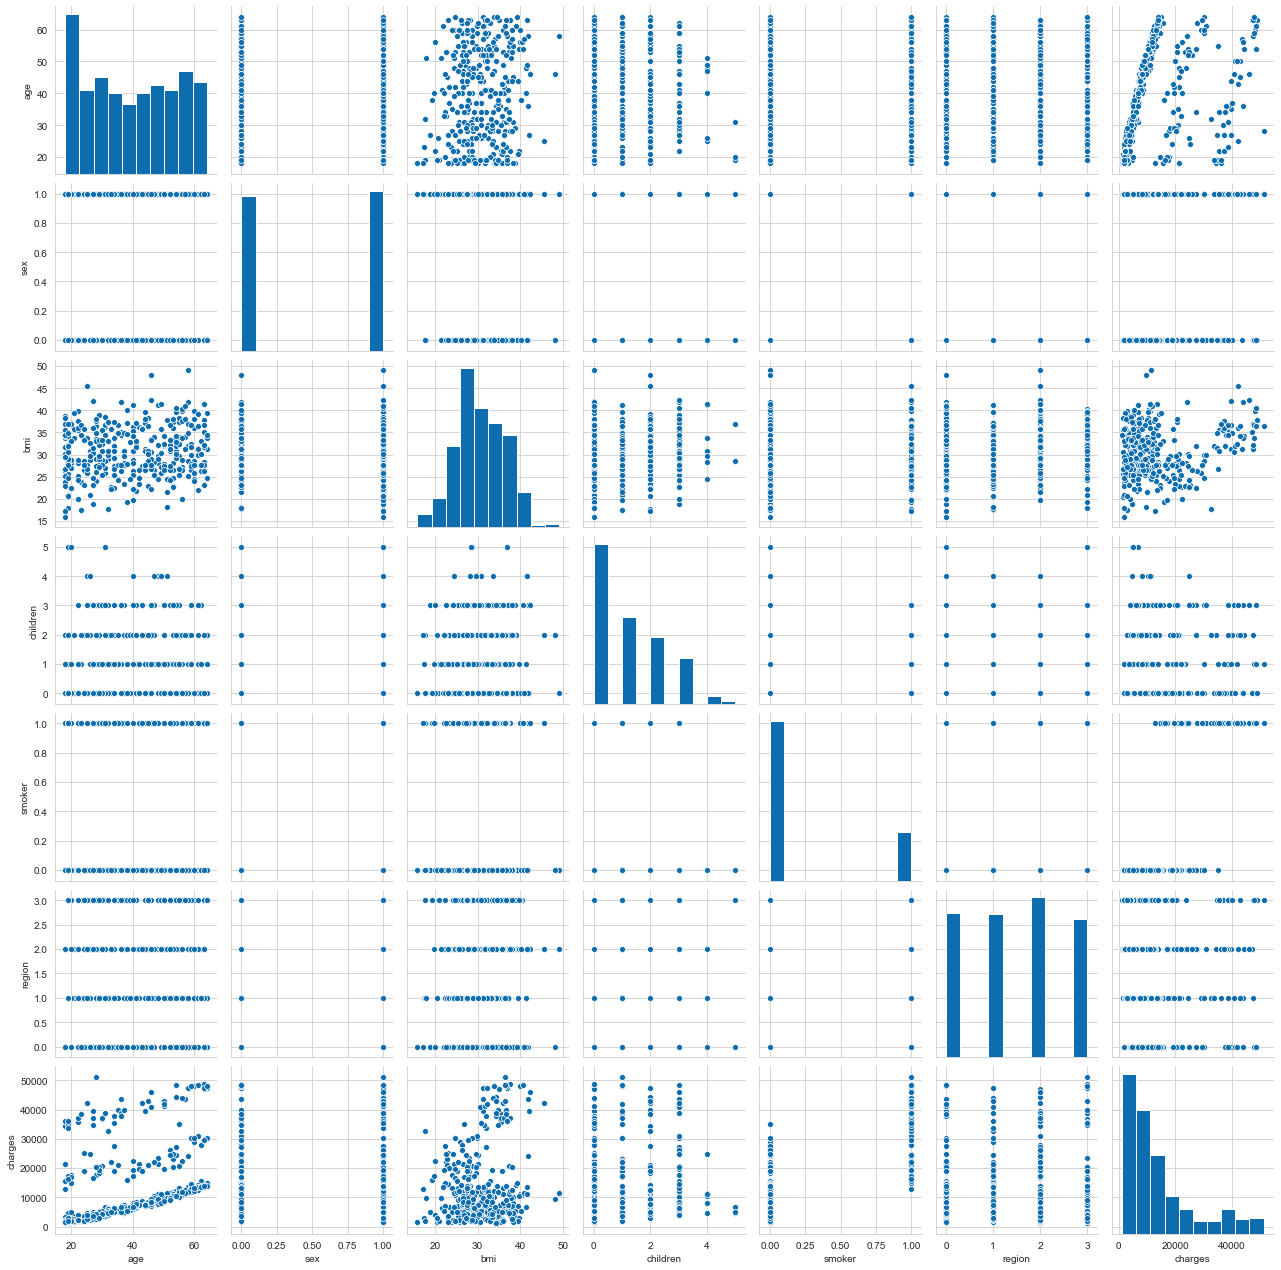

In [12]:
# Pair Plot
sns.pairplot(Insurance_df)

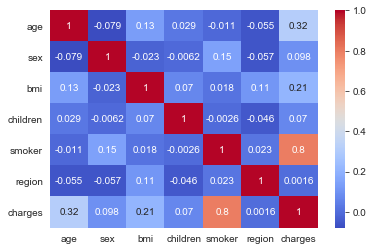

In [13]:
# Heat Map
sns.heatmap(Insurance_df.corr(), annot=True, cmap='coolwarm')

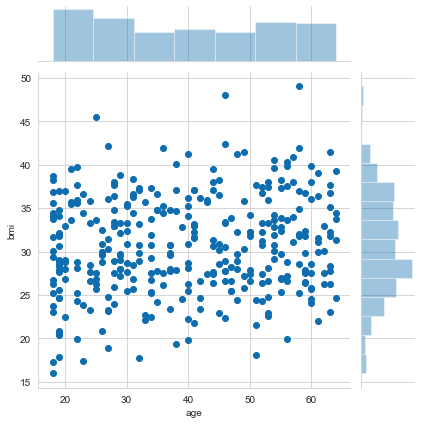

In [17]:
# Joint Plot between age and bmi
sns.jointplot(x='age', y='bmi', data=Insurance_df)

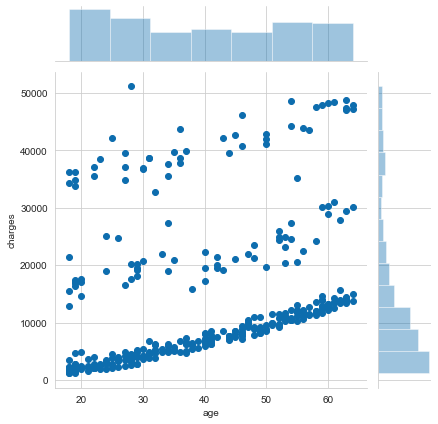

In [18]:
# Joint Plot between age and charges
sns.jointplot(x='age', y='charges', data=Insurance_df)

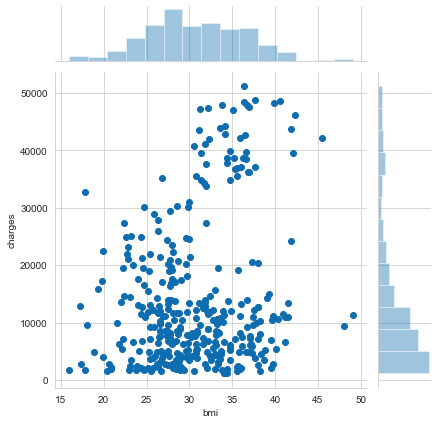

In [19]:
# Joint Plot between bmi and charges
sns.jointplot(x='bmi', y='charges', data=Insurance_df)

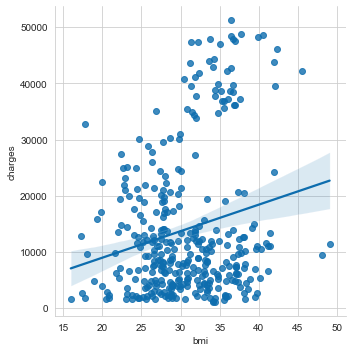

In [20]:
# Lmplot between bmi and charges
sns.lmplot(x='bmi', y='charges', data=Insurance_df)

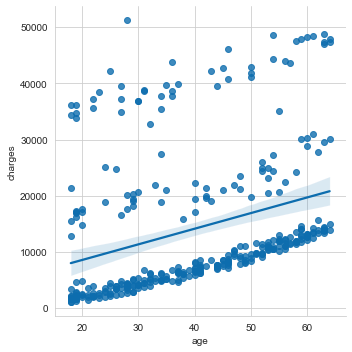

In [21]:
# Lmplot between age and charges
sns.lmplot(x='age', y='charges', data=Insurance_df)

In [22]:
# Split columns into X and y
X = Insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = Insurance_df['charges']

In [23]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [25]:
# Create and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Coefficient of the data
print('Coefficient: \n\n',model.coef_)

Coefficient: 

 [ 2.71369910e+02 -1.28359794e+01  3.73142002e+02  3.04480659e+02
  2.30845237e+04 -2.48291640e+01]


In [30]:
# prediction
pred1 = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

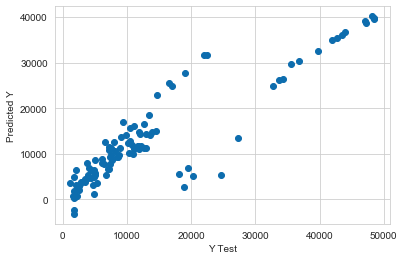

In [31]:
# Scatter Plot for Y Test against Predicted Y
plt.scatter(y_test, pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
# Regression Metrics Libraries and Explained Variance Score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Mean Absolute Error
print('MAE: ',mean_absolute_error(y_test, pred1))

# Mean Squared Error
print('MSE: ',mean_squared_error(y_test, pred1))

# Root Mean Squared Error
print('RMSE: ',np.sqrt(mean_squared_error(y_test, pred1)))
print('\n')

# Explained Variance Score
print('Variance Score: ',explained_variance_score(y_test, pred1))

MAE:  3892.898653854586
MSE:  30688136.196840353
RMSE:  5539.687373565439


Variance Score:  0.8156770116821818


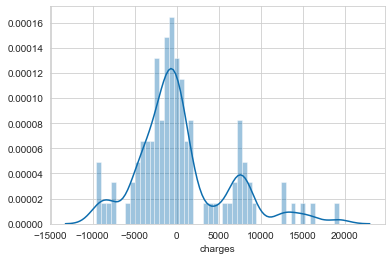

In [33]:
# Residual Distplot
sns.distplot((y_test-pred1), bins=50)

In [34]:
# CDF
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
age,271.369910
sex,-12.835979
bmi,373.142002
children,304.480659
smoker,23084.523730
region,-24.829164
